In [67]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gstools as gs

import seaborn as sns


import numpy as np
import gstools as gs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 模拟数据生成
x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
XX, YY = np.meshgrid(x, y)
model = gs.Gaussian(dim=2, var=1, len_scale=3)
srf = gs.SRF(model, mean=0.)
B0 = srf((x, y), mesh_type='structured', seed=100)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


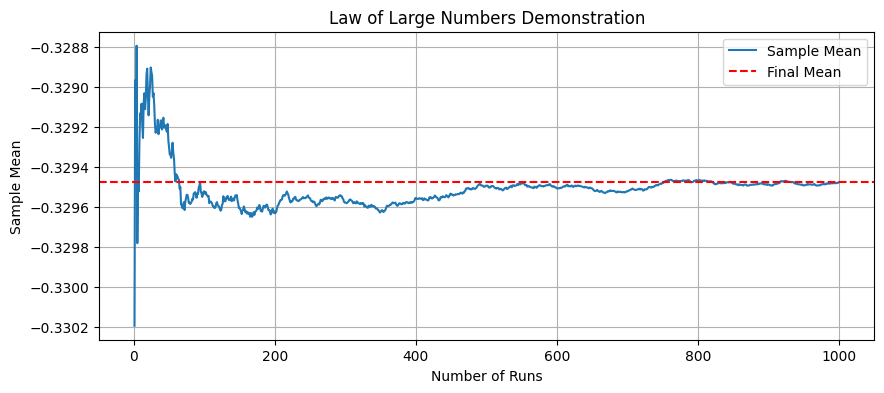

In [68]:
# Field continuous



# 带有随机性的处理数据函数
def process_data_with_randomness_field_continuous(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    y_pred_full = rf.predict(X).reshape(XX.shape)
    y_pred_full_column = y_pred_full.ravel()
    return y_pred_full_column


# 带有随机性的处理数据函数，使用 KMeans 聚类并计算簇内平方和（Inertia）
def process_data_with_randomness_field_discrete(data):
    kmeans = KMeans(n_clusters=4, n_init=10, random_state=None)  # 这里增加了 n_init 参数
    kmeans.fit(data)
    inertia = kmeans.inertia_  # 簇内平方和
    return inertia

def process_data_with_randomness(B_discretized):
    # 构建转移概率矩阵
    transition_matrix = np.zeros((n_states, n_states))

    for month in range(dimensionxy-1):  # 24次状态转移
        for day in range(dimensionxy):
            current_state = int(B_discretized[month, day])
            next_state = int(B_discretized[month + 1, day])
            transition_matrix[current_state, next_state] += 1

    # 归一化转移概率矩阵
    transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

    # 使用马尔可夫链预测第26个月的状态
    last_month_states = B_discretized[-1, :]
    predicted_states = []

    for state in last_month_states:
        predicted_state = np.random.choice(np.arange(n_states), p=transition_matrix[int(state)])
        predicted_states.append(predicted_state)

    # print(predicted_states)
    # return predicted_states
    # 预测值从状态返回到实际值范围
    B26_pred = est.inverse_transform([predicted_states])

    predicted_value=B26_pred.flatten()

    return predicted_value

# 计算收敛点函数
def calcuCirculation_for_point(X_train, X_test, y_train, y_test, time):
    for i_time in range(1, time):
        print(i_time)
        processed_value = process_data_with_randomness(X_train, X_test, y_train, y_test)
        current_mean = np.mean(processed_value)
        results.append(current_mean)
        previous_mean_array.append(np.mean(results))


# 运行代码
times = 1001
threshold = 1e-5
dimensionxy=25
results = []
previous_mean_array = []
convergence_point = None


LLNtype=["field-continuous","field-discrete","line-continuous","line-discrete","point-continuous","point-discrete",]
for type in LLNtype:
    print("type")
    for i_time in range(1, times):
        if(type =="field-continuous"):
            X = np.column_stack([XX.ravel(), YY.ravel()])
            y = B0.ravel()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            processed_value = process_data_with_randomness_field_continuous(X_train, X_test, y_train, y_test)
            current_mean = np.mean(processed_value)
            results.append(current_mean)
            previous_mean_array.append(np.mean(results))
        if(type =="field-discrete"):
            data = B0.reshape(-1, 1)  # 将数据重塑为一列
            processed_value = process_data_with_randomness_field_discrete(data)
            current_mean = processed_value
            results.append(current_mean)
            previous_mean_array.append(np.mean(results))
        if(type =="line-continuous"):
            n_states = 5
            est = KBinsDiscretizer(n_bins=n_states, encode='ordinal', strategy='uniform')
            B_discretized = est.fit_transform(B0).astype(int)
            
        if(type =="line-discrete"):
        if(type =="point-continuous"):
        if(type =="point-discrete"):
            

# calcuCirculation_for_point(X_train, X_test, y_train, y_test, times)
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(previous_mean_array) + 1), previous_mean_array, label='Sample Mean')
plt.axhline(y=np.mean(results), color='r', linestyle='--', label=f'Final Mean')
plt.xlabel('Number of Runs')
plt.ylabel('Sample Mean')
plt.title('Law of Large Numbers Demonstration')
plt.legend()
plt.grid(True)
plt.show()

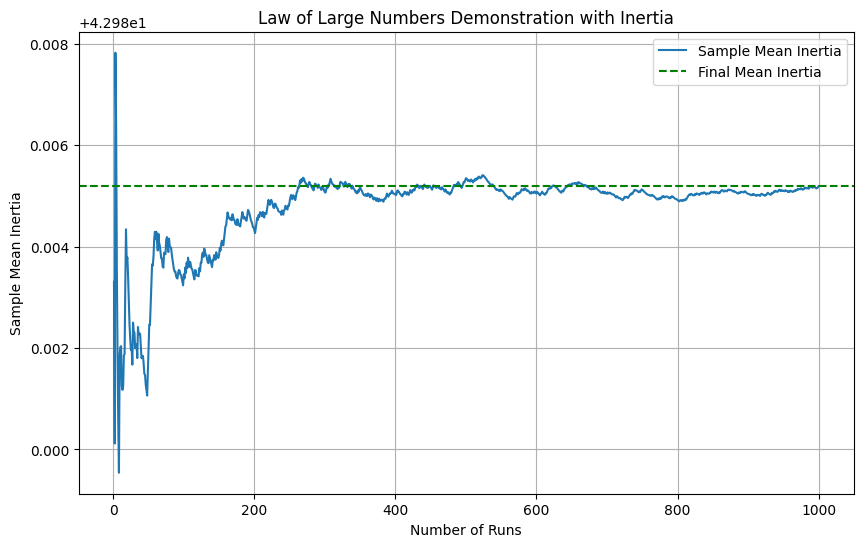

In [69]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 模拟数据生成
data = B0.reshape(-1, 1)  # 将数据重塑为一列

# 带有随机性的处理数据函数，使用 KMeans 聚类并计算簇内平方和（Inertia）
def process_data_with_randomness(data, n_clusters=4, n_init=10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=None)  # 这里增加了 n_init 参数
    kmeans.fit(data)
    inertia = kmeans.inertia_  # 簇内平方和
    return inertia

# 计算收敛点函数
def calcuCirculation_for_point(data, time, n_clusters=4, n_init=10):
    threshold = 1e-4  # 增大阈值
    results = []
    previous_mean_array = []

    convergence_point = None

    for i_time in range(1, time):
        processed_value = process_data_with_randomness(data, n_clusters, n_init)
        current_mean = processed_value
        # print(i_time,abs(current_mean - np.mean(results)))

        # if i_time > 1 and abs(current_mean - np.mean(results)) < threshold:
        #     convergence_point = i_time + 1
        #     break

        results.append(current_mean)
        previous_mean_array.append(np.mean(results))



    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(previous_mean_array) + 1), previous_mean_array, label='Sample Mean Inertia')
    plt.axhline(y=np.mean(results), color='g', linestyle='--', label=f'Final Mean Inertia')
    plt.xlabel('Number of Runs')
    plt.ylabel('Sample Mean Inertia')
    plt.title('Law of Large Numbers Demonstration with Inertia')
    plt.legend()
    plt.grid(True)
    plt.show()

# 运行代码
times = 1001
calcuCirculation_for_point(data, times, n_clusters=4, n_init=10)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


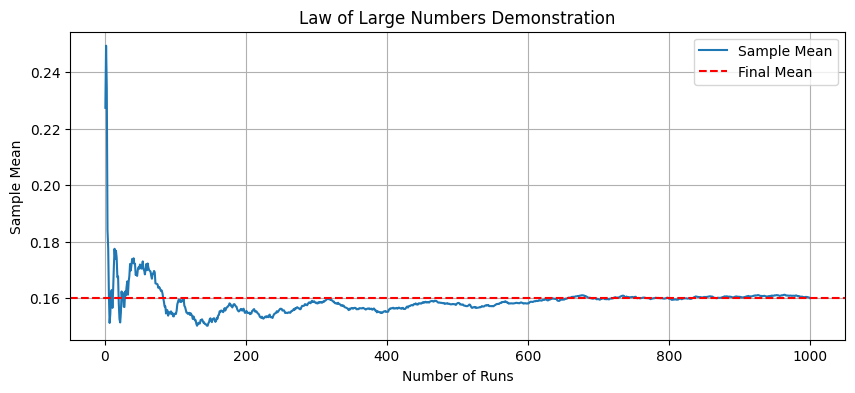

In [70]:
#line continuous
from sklearn.preprocessing import KBinsDiscretizer
from hmmlearn import hmm

# 定义状态数
dimensionxy = 25
n_states = 5
est = KBinsDiscretizer(n_bins=n_states, encode='ordinal', strategy='uniform')
B_discretized = est.fit_transform(B0).astype(int)

# 带有随机性的处理数据函数
# def process_data_with_randomness(X_train, X_test, y_train, y_test):
#     rf = RandomForestRegressor(n_estimators=100)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)

#     y_pred_full = rf.predict(X).reshape(XX.shape)
#     y_pred_full_column = y_pred_full.ravel()
#     return y_pred_full_column

# def process_data_with_randomness(B_discretized):
#     # 准备HMM模型
#     model = hmm.MultinomialHMM(n_components=n_states, n_iter=100, random_state=42)
    
#     # 将前25行的数据展开成序列
#     sequence = B_discretized[:dimensionxy, :].reshape(-1, 1)
#     model.fit(sequence)

#     # 预测第26行的状态
#     predicted_states = []
#     for day in range(dimensionxy):
#         last_state = B_discretized[-1, day]
#         next_state_probabilities = model.transmat_[int(last_state)]
#         predicted_state = np.random.choice(np.arange(n_states), p=next_state_probabilities)
#         predicted_states.append(predicted_state)
#     return predicted_states
def process_data_with_randomness(B_discretized):
    # 构建转移概率矩阵
    transition_matrix = np.zeros((n_states, n_states))

    for month in range(dimensionxy-1):  # 24次状态转移
        for day in range(dimensionxy):
            current_state = int(B_discretized[month, day])
            next_state = int(B_discretized[month + 1, day])
            transition_matrix[current_state, next_state] += 1

    # 归一化转移概率矩阵
    transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

    # 使用马尔可夫链预测第26个月的状态
    last_month_states = B_discretized[-1, :]
    predicted_states = []

    for state in last_month_states:
        predicted_state = np.random.choice(np.arange(n_states), p=transition_matrix[int(state)])
        predicted_states.append(predicted_state)

    # print(predicted_states)
    # return predicted_states
    # 预测值从状态返回到实际值范围
    B26_pred = est.inverse_transform([predicted_states])

    predicted_value=B26_pred.flatten()

    return predicted_value


# 计算收敛点函数
def calcuCirculation_for_point(B_discretized, time):


    for i_time in range(1, time):
        print(i_time)
        processed_value = process_data_with_randomness(B_discretized)
        current_mean = np.mean(processed_value)
        # print(abs(current_mean - np.mean(results)))
        # if i_time > 1 and abs(current_mean - np.mean(results)) < threshold:
        #     convergence_point = i_time + 1  # +1因为索引从0开始
        #     break

        results.append(current_mean)
        previous_mean_array.append(np.mean(results))

    # 检查是否有收敛
    # if convergence_point is None:
    #     print(f"未在 {time} 次实验内达到收敛。")
    # else:
    #     print(f"函数输出在第 {convergence_point} 次调用时收敛。")

    # 绘制样本平均值的变化趋势
# 绘制样本平均值的变化趋势


# 运行代码
times = 1001
threshold = 1e-4
results = []
previous_mean_array = []

convergence_point = None
calcuCirculation_for_point(B_discretized,times)
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(previous_mean_array) + 1), previous_mean_array, label='Sample Mean')
plt.axhline(y=np.mean(results), color='r', linestyle='--', label=f'Final Mean')
plt.xlabel('Number of Runs')
plt.ylabel('Sample Mean')
plt.title('Law of Large Numbers Demonstration')
plt.legend()
plt.grid(True)
plt.show()